In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
jsw = pd.read_csv('jsw - sheet1.csv')
tts = pd.read_csv('Tatasteel - sheet1.csv')
lnt = pd.read_csv('LT - sheet1.csv')
ult = pd.read_csv('ultratech - sheet1.csv')

In [72]:
jsw['Date'] = pd.to_datetime(jsw['Date'], infer_datetime_format=True)
jsw['Date'] = pd.to_datetime(jsw['Date']).dt.date

tts['Date'] = pd.to_datetime(tts['Date'], infer_datetime_format=True)
tts['Date'] = pd.to_datetime(tts['Date']).dt.date

lnt['Date'] = pd.to_datetime(lnt['Date'], infer_datetime_format=True)
lnt['Date'] = pd.to_datetime(lnt['Date']).dt.date

ult['Date'] = pd.to_datetime(ult['Date'], infer_datetime_format=True)
ult['Date'] = pd.to_datetime(ult['Date']).dt.date

In [73]:
jsw = jsw.set_index('Date')
tts = tts.set_index('Date')
lnt = lnt.set_index('Date')
ult = ult.set_index('Date')

In [74]:
jsw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02,39.19,39.92,38.81,39.56,324140
2007-01-03,39.56,40.71,39.00,40.37,978453
2007-01-04,40.00,41.35,39.00,39.22,431202
2007-01-05,39.40,39.84,38.65,39.67,351184
2007-01-08,38.03,39.70,38.03,38.89,226424


In [75]:
tts.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02,35.74,36.32,35.30,35.57,1034256
2007-01-03,40.26,40.50,39.52,39.63,1452980
2007-01-04,39.80,39.93,38.72,39.16,1796599
2007-01-05,39.17,39.68,38.47,39.39,3036784
2007-01-08,39.70,39.70,38.84,39.00,1332410


In [76]:
lnt.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02,321.56,327.11,320.49,324.48,173845
2007-01-03,324.00,330.43,315.56,328.08,681368
2007-01-04,331.04,334.22,329.33,331.86,662154
2007-01-05,333.33,333.33,325.11,326.84,345218
2007-01-08,326.89,326.89,319.22,324.82,356408


In [77]:
ult.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02,1123.9,1138.0,1095.10,1130.00,65217
2007-01-03,1143.0,1143.0,1099.00,1105.20,49386
2007-01-04,1110.0,1119.0,1084.15,1108.40,58691
2007-01-05,1115.0,1132.9,1093.00,1119.05,53017
2007-01-08,1119.0,1119.0,1085.00,1091.75,22713


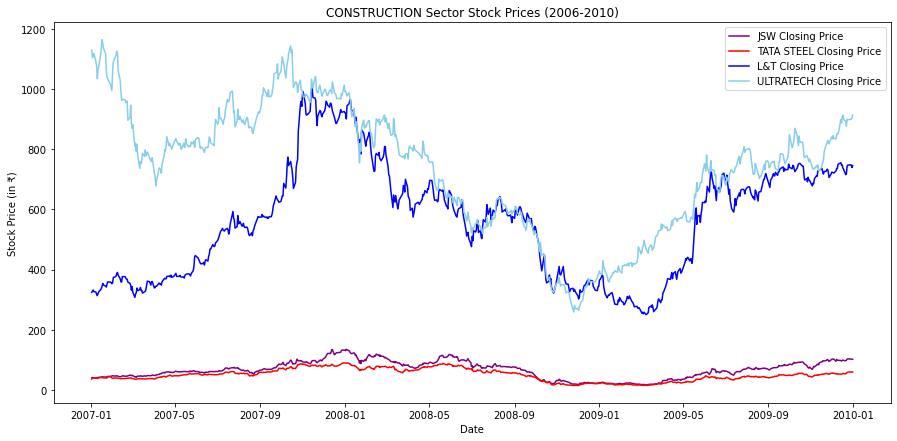

In [78]:
plt.figure(figsize=(15,7))
jsw['Close'].plot(label='JSW Closing Price', color = 'purple')
tts['Close'].plot(label='TATA STEEL Closing Price', color = 'red')
lnt['Close'].plot(label='L&T Closing Price', color = 'blue')
ult['Close'].plot(label='ULTRATECH Closing Price', color ='skyblue')
plt.title("CONSTRUCTION Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in ₹)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

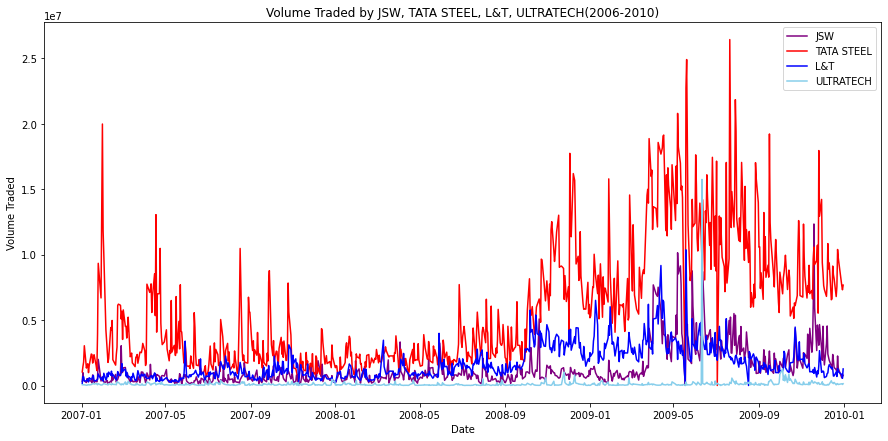

In [79]:
plt.figure(figsize=(15,7))
jsw['Volume'].plot(label='JSW', color = 'purple')
tts['Volume'].plot(label='TATA STEEL', color = 'red')
lnt['Volume'].plot(label='L&T', color = 'blue')
ult['Volume'].plot(label='ULTRATECH', color ='skyblue')
plt.title("Volume Traded by JSW, TATA STEEL, L&T, ULTRATECH(2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [80]:
tts.iloc[[tts['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-07-21,36.87,39.53,35.9,39.27,26418888


In [81]:
ult.iloc[[ult['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-06-11,741.45,765.0,705.1,732.15,15738575


In [82]:
!pip install mpl_finance


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
jsw['Total Traded'] = jsw['Open'] * jsw['Volume']
tts['Total Traded'] = tts['Open'] * tts['Volume']
lnt['Total Traded'] = lnt['Open'] * lnt['Volume']
ult['Total Traded'] = ult['Open'] * ult['Volume']

Text(0.5, 1.0, 'Market Capitalisation of jsw, tts, lnt & INFY (2006-2010)')

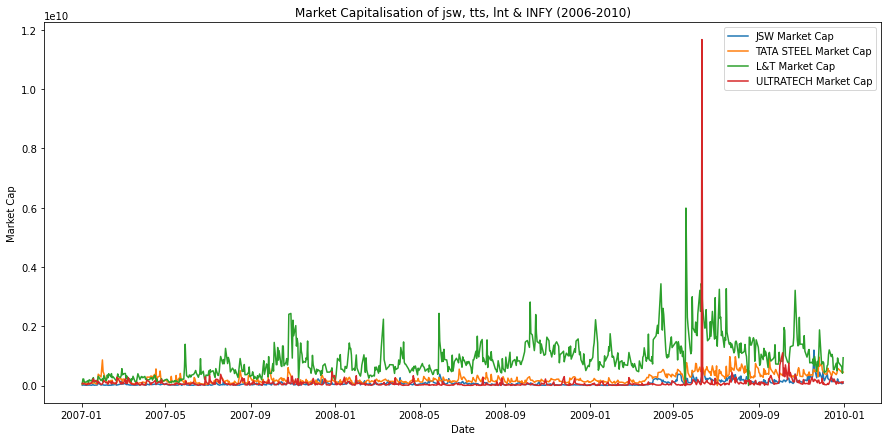

In [84]:
plt.figure(figsize = (15,7))
jsw['Total Traded'].plot(label = 'JSW Market Cap')
tts['Total Traded'].plot(label = 'TATA STEEL Market Cap')
lnt['Total Traded'].plot(label = 'L&T Market Cap')
ult['Total Traded'].plot(label = 'ULTRATECH Market Cap')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Capitalisation of jsw, tts, lnt & INFY (2006-2010)')

In [85]:
ult.iloc[[ult['Total Traded'].argmax()]]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2009-06-11,741.45,765.0,705.1,732.15,15738575,1.166937e+10


In [86]:
from pandas.plotting import scatter_matrix

In [87]:
const = pd.concat([jsw['Open'], tts['Open'], lnt['Open'], ult['Open']], axis = 1)
const.columns = ['jsw Open', 'tts Open', 'lntTECH Open', 'INFY Open']

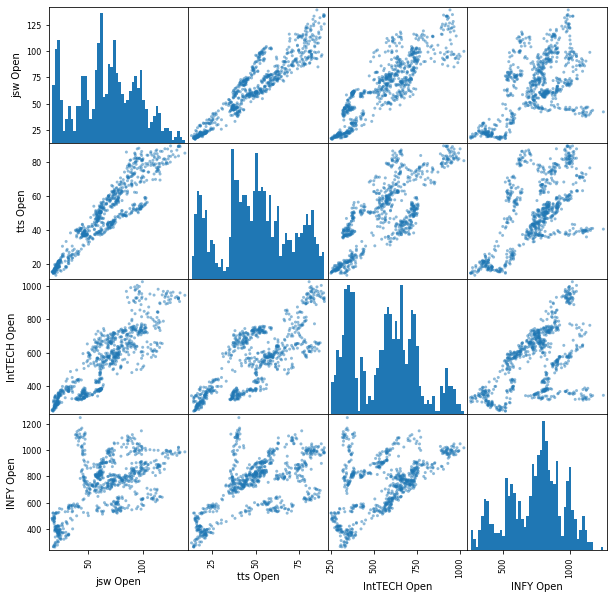

In [88]:
scatter_matrix(const, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [89]:
jsw['returns'] = (jsw['Close']/jsw['Close'].shift(1)) - 1
tts['returns'] = (tts['Close']/tts['Close'].shift(1)) - 1
lnt['returns'] = (lnt['Close']/lnt['Close'].shift(1)) - 1
ult['returns'] = (ult['Close']/ult['Close'].shift(1)) - 1

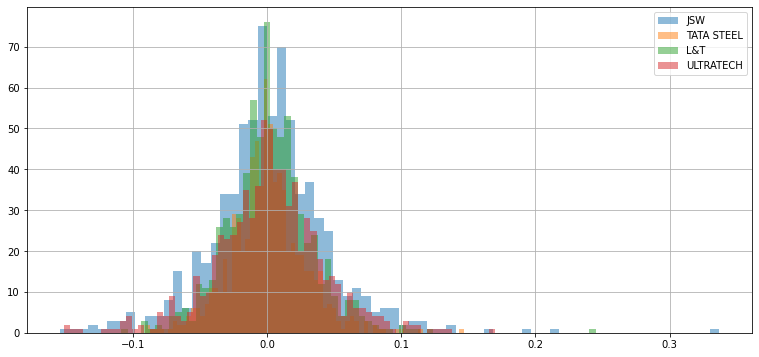

In [90]:
jsw['returns'].hist(bins = 70, label = 'JSW', alpha = 0.5, figsize = (13, 6))
ult['returns'].hist(bins = 70, label = 'TATA STEEL', alpha = 0.5)
lnt['returns'].hist(bins = 70, label = 'L&T', alpha = 0.5)
tts['returns'].hist(bins = 70, label = 'ULTRATECH', alpha = 0.5)
plt.legend()

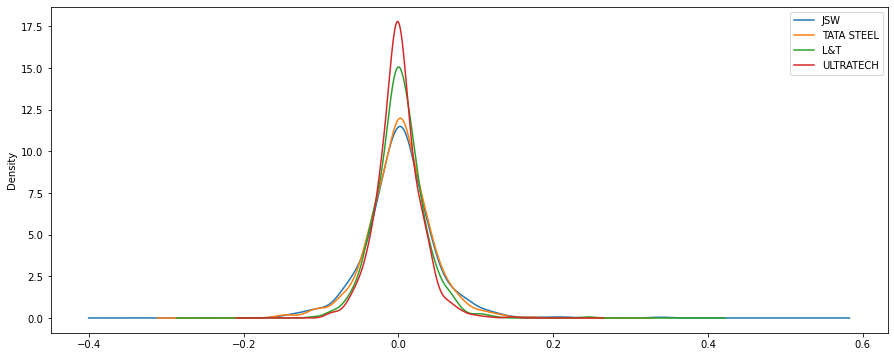

In [91]:
jsw['returns'].plot(kind='kde', label = 'JSW', figsize = (15, 6))
tts['returns'].plot(kind='kde', label = 'TATA STEEL')
lnt['returns'].plot(kind='kde', label = 'L&T')
ult['returns'].plot(kind='kde', label = 'ULTRATECH')
plt.legend()

<AxesSubplot:>

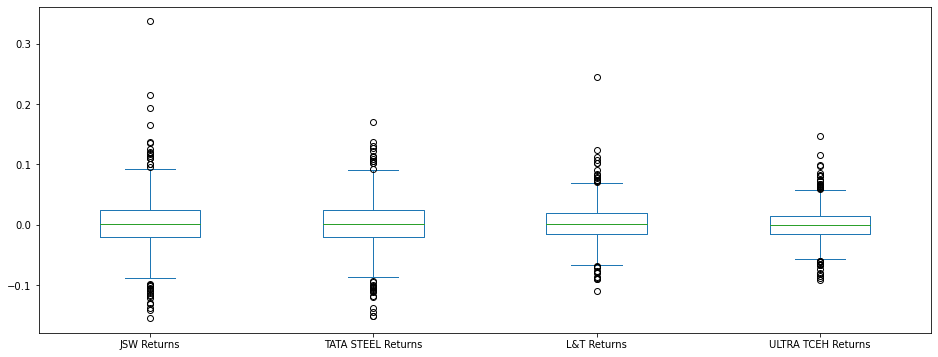

In [92]:
box_df =  pd.concat([jsw['returns'], tts['returns'], lnt['returns'], ult['returns']], axis = 1)
box_df.columns = ['JSW Returns', 'TATA STEEL Returns', 'L&T Returns', 'ULTRA TCEH Returns']
box_df.plot(kind = 'box', figsize = (16,6))

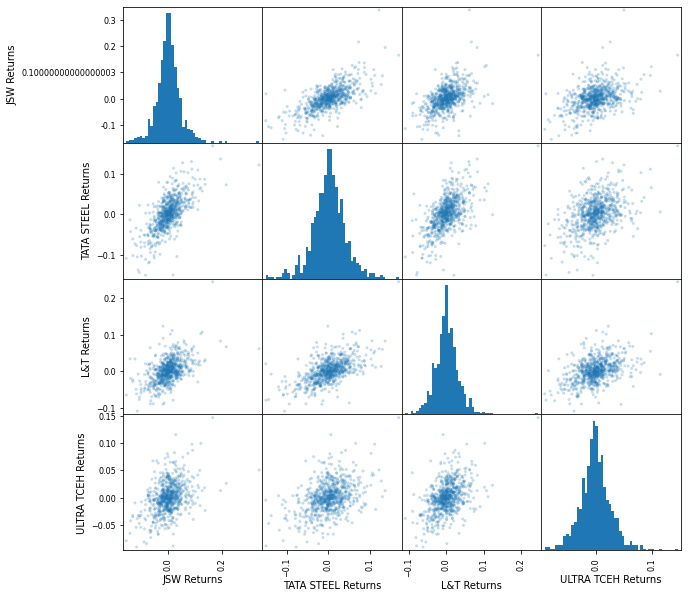

In [93]:
scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [94]:
jsw['cumulative_returns'] = (1 + jsw['returns']).cumprod()
tts['cumulative_returns'] = (1 + tts['returns']).cumprod()
lnt['cumulative_returns'] = (1 + lnt['returns']).cumprod()
ult['cumulative_returns'] = (1 + ult['returns']).cumprod()

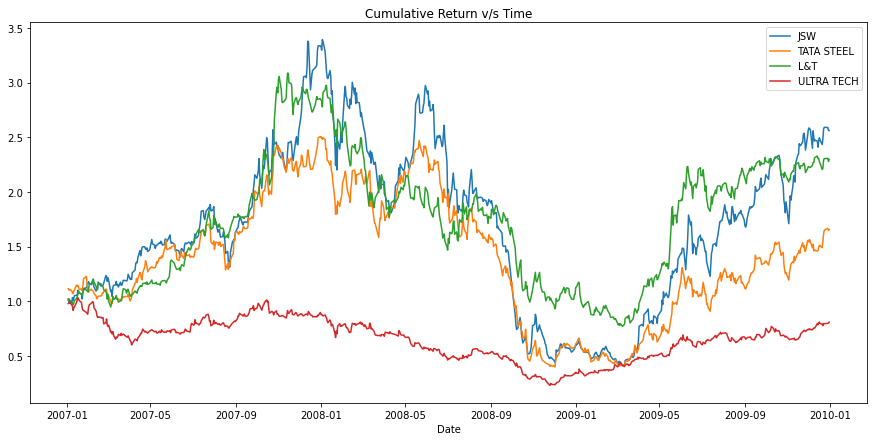

In [95]:
jsw['cumulative_returns'].plot(label='JSW', figsize = (15, 7))
tts['cumulative_returns'].plot(label='TATA STEEL')
lnt['cumulative_returns'].plot(label='L&T')
ult['cumulative_returns'].plot(label='ULTRA TECH')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()

American Companies

In [96]:
cat = pd.read_csv("Cat - Sheet1.csv")
nue = pd.read_csv("Nue - Sheet1.csv")
phm = pd.read_csv("Phm - Sheet1.csv")
vmc = pd.read_csv("VMC - Sheet1.csv")

In [97]:
cat['Date'] = pd.to_datetime(cat['Date'], infer_datetime_format=True)
cat['Date'] = pd.to_datetime(cat['Date']).dt.date
nue['Date'] = pd.to_datetime(nue['Date'], infer_datetime_format=True)
nue['Date'] = pd.to_datetime(nue['Date']).dt.date
phm['Date'] = pd.to_datetime(phm['Date'], infer_datetime_format=True)
phm['Date'] = pd.to_datetime(phm['Date']).dt.date
vmc['Date'] = pd.to_datetime(vmc['Date'], infer_datetime_format=True)
vmc['Date'] = pd.to_datetime(vmc['Date']).dt.date

In [98]:
cat = cat.set_index('Date')
nue = nue.set_index('Date')
phm = phm.set_index('Date')
vmc = vmc.set_index('Date')


In [99]:
cat.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,61.71,62.31,60.70,61.16,6138900
2007-01-04,61.25,61.28,60.34,61.00,4060200
2007-01-05,60.77,60.92,59.95,60.22,6267100
2007-01-08,60.09,60.57,59.86,60.29,3943000
2007-01-09,60.46,60.70,60.00,60.62,3929100


In [100]:
nue.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,54.66,55.25,53.20,54.50,4668700
2007-01-04,54.30,55.08,54.00,54.92,3401900
2007-01-05,54.79,55.69,54.16,54.73,4263700
2007-01-08,55.40,56.06,54.78,55.95,4712500
2007-01-09,55.11,56.30,54.83,55.65,4507100


In [101]:
phm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,33.13,33.35,32.03,32.37,2892200
2007-01-04,32.37,32.47,31.73,31.91,2982300
2007-01-05,31.72,32.12,31.55,31.94,2011400
2007-01-08,32.01,32.01,31.03,31.47,2921900
2007-01-09,31.52,31.72,31.18,31.31,2409100


In [102]:
vmc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,90.23,91.85,89.17,89.95,550500
2007-01-04,90.04,90.63,89.20,89.69,383900
2007-01-05,89.35,89.39,87.70,88.26,680300
2007-01-08,88.26,88.94,87.27,88.86,734000
2007-01-09,88.89,90.10,88.85,89.75,488800


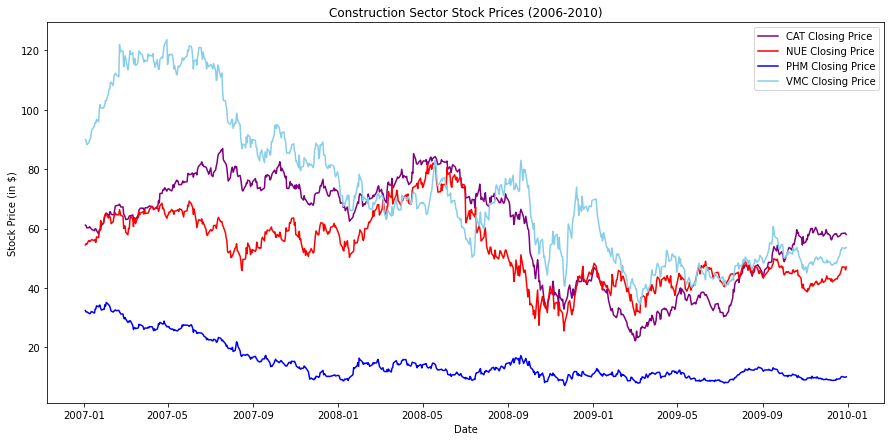

In [103]:
plt.figure(figsize=(15,7))
cat['Close'].plot(label='CAT Closing Price', color = 'purple')
nue['Close'].plot(label='NUE Closing Price', color = 'red')
phm['Close'].plot(label='PHM Closing Price', color = 'blue')
vmc['Close'].plot(label='VMC Closing Price', color ='skyblue')
plt.title("Construction Sector Stock Prices (2006-2010)")
plt.xlabel("Date")
plt.ylabel("Stock Price (in $)")
plt.legend()

Text(0, 0.5, 'Volume Traded')

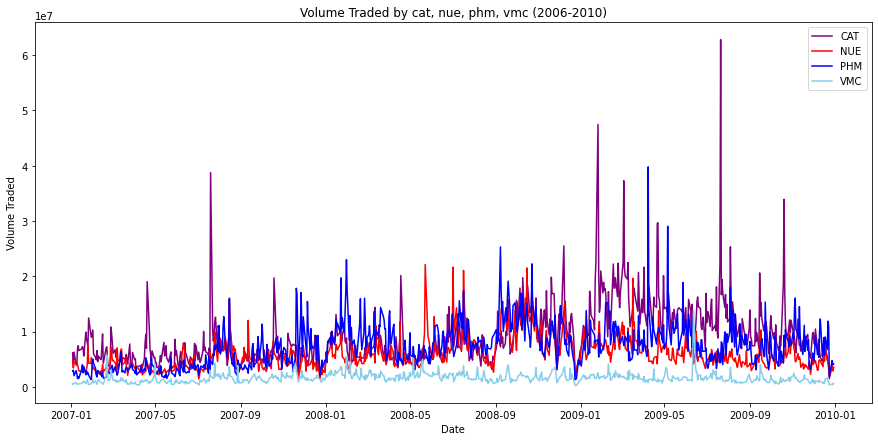

In [104]:
plt.figure(figsize=(15,7))
cat['Volume'].plot(label='CAT', color = 'purple')
nue['Volume'].plot(label='NUE', color = 'red')
phm['Volume'].plot(label='PHM', color = 'blue')
vmc['Volume'].plot(label='VMC', color ='skyblue')
plt.title("Volume Traded by cat, nue, phm, vmc (2006-2010)")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume Traded')

In [105]:
cat.iloc[[cat['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-07-21,40.81,41.45,38.04,39.46,62789276


In [106]:
phm.iloc[[phm['Volume'].argmax()]]

,Open,High,Low,Close,Volume
Date,,,,,
2009-04-08,10.55,10.6,9.33,9.64,39770024


In [107]:
cat['Total Traded'] = cat['Open'] * cat['Volume']
nue['Total Traded'] = nue['Open'] * nue['Volume']
phm['Total Traded'] = phm['Open'] * phm['Volume']
vmc['Total Traded'] = vmc['Open'] * vmc['Volume']

In [108]:
# plt.figure(figsize = (15,7))
# cat['Total Traded'].plot(label = 'cat Market Cap')
# nue['Total Traded'].plot(label = 'nue Market Cap')
# phm['Total Traded'].plot(label = 'phm Market Cap')
# vmc['Total Traded'].plot(label = 'vmc Market Cap')
# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('Market Cap')
# plt.title('Market Capitalisation of cat, nue, phm, vmc(2006-2010)')

In [109]:
# tts.iloc[[tts['Total Traded'].argmax()]]

In [110]:
from pandas.plotting import scatter_matrix

In [111]:
constA = pd.concat([cat['Open'], nue['Open'],phm['Open'], vmc['Open']], axis = 1)
constA.columns = ['CAT Open', 'NUE Open', 'PHM Open', 'VMC Open']

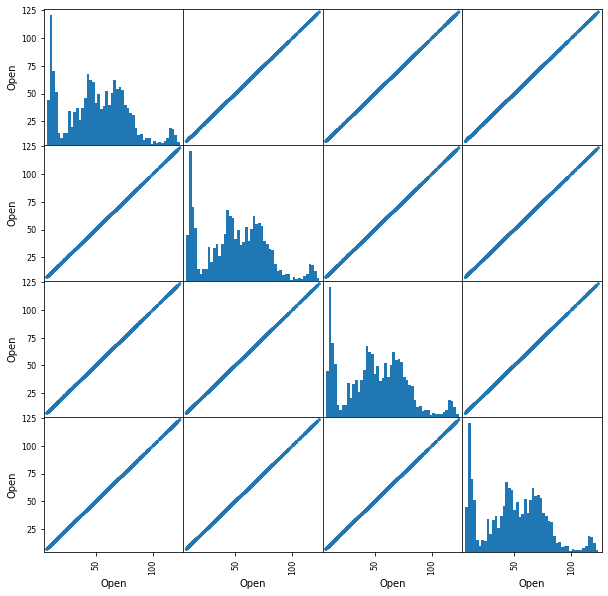

In [112]:
scatter_matrix(constA, figsize = (10, 10), hist_kwds={'bins':50})
plt.show()

In [113]:
cat['returns'] = (cat['Close']/cat['Close'].shift(1)) - 1
nue['returns'] = (nue['Close']/nue['Close'].shift(1)) - 1
phm['returns'] = (phm['Close']/phm['Close'].shift(1)) - 1
vmc['returns'] = (vmc['Close']/vmc['Close'].shift(1)) - 1

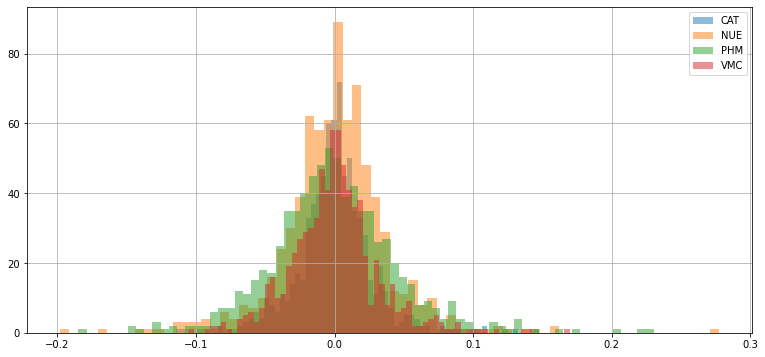

In [114]:
cat['returns'].hist(bins = 70, label = 'CAT', alpha = 0.5, figsize = (13, 6))
nue['returns'].hist(bins = 70, label = 'NUE', alpha = 0.5)
phm['returns'].hist(bins = 70, label = 'PHM', alpha = 0.5)
vmc['returns'].hist(bins = 70, label = 'VMC', alpha = 0.5)
plt.legend()


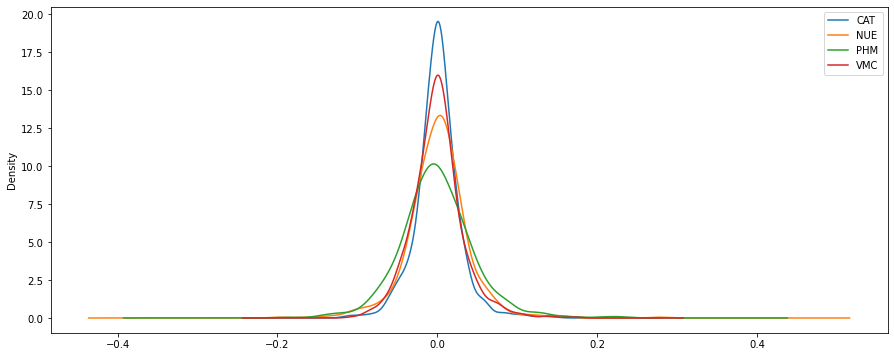

In [115]:
cat['returns'].plot(kind='kde', label = 'CAT', figsize = (15, 6))
nue['returns'].plot(kind='kde', label = 'NUE')
phm['returns'].plot(kind='kde', label = 'PHM')
vmc['returns'].plot(kind='kde', label = 'VMC')
plt.legend()

<AxesSubplot:>

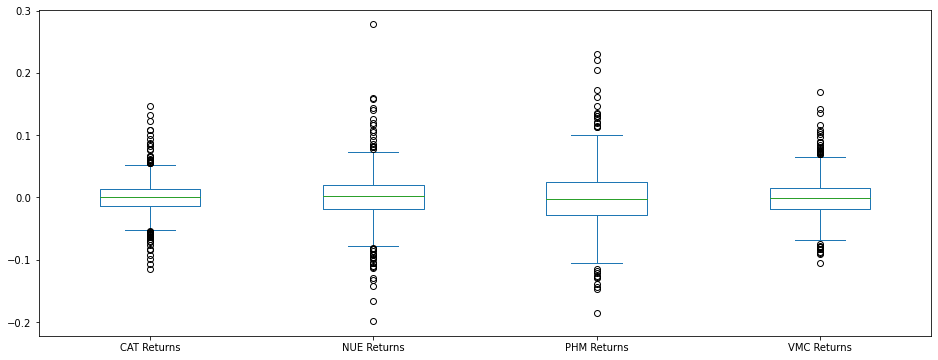

In [116]:
boxA_df = pd.concat([cat['returns'], nue['returns'], phm['returns'], vmc['returns']], axis=1)
boxA_df.columns = ['CAT Returns', 'NUE Returns', 'PHM Returns', 'VMC Returns']
boxA_df.plot(kind = 'box', figsize = (16,6))


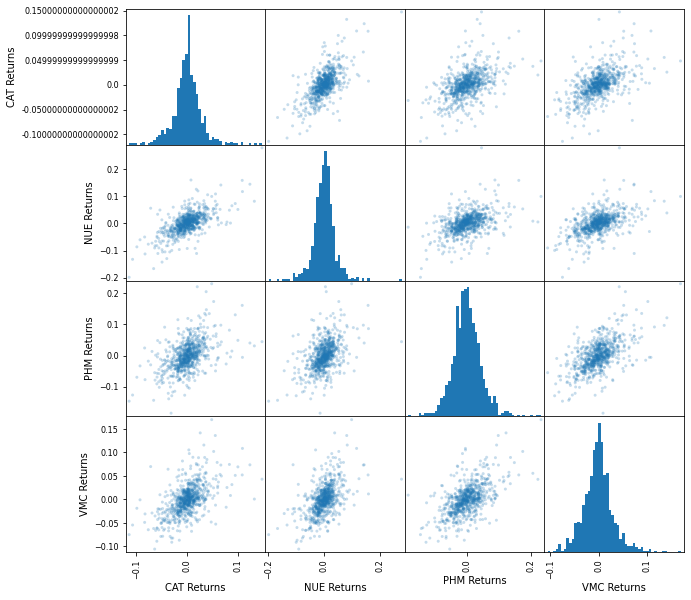

In [117]:
scatter_matrix(boxA_df, figsize = (10, 10), hist_kwds={'bins':50}, alpha = 0.25)
plt.show()

In [118]:
cat['cumulative_returns'] = (1 + cat['returns']).cumprod()
nue['cumulative_returns'] = (1 + nue['returns']).cumprod()
phm['cumulative_returns'] = (1 + phm['returns']).cumprod()
vmc['cumulative_returns'] = (1 + vmc['returns']).cumprod()


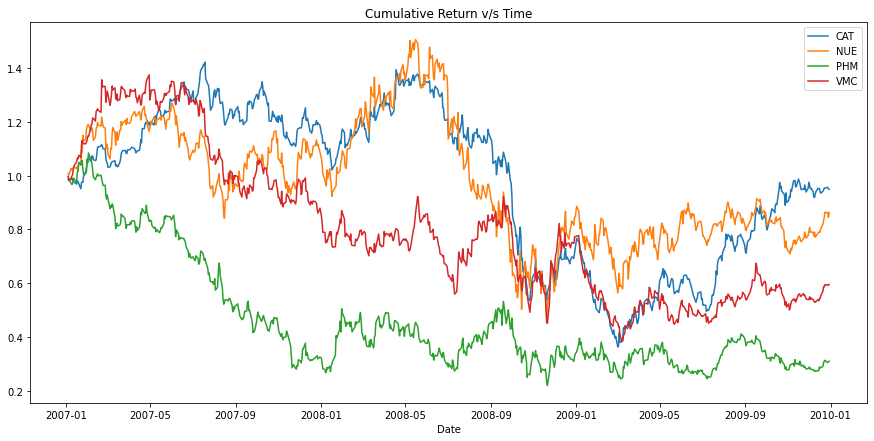

In [119]:
cat['cumulative_returns'].plot(label='CAT', figsize = (15, 7))
nue['cumulative_returns'].plot(label='NUE')
phm['cumulative_returns'].plot(label='PHM')
vmc['cumulative_returns'].plot(label='VMC')
plt.title('Cumulative Return v/s Time')
plt.legend()
plt.show()